In [1]:
# !pip install SVM

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv("fraudTrain.csv")
# print(df.head(2))
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
arry = set(df['unix_time'])
print(len(arry))
print(df.size)

1274823
29823525


In [5]:
from datetime import datetime
label_encoder = LabelEncoder()
# df.drop(['merchant'])
df.drop(['trans_date_trans_time','Unnamed: 0'],axis=1,inplace=True)
df['merchant'] = label_encoder.fit_transform(df['merchant'])
df['category'] = label_encoder.fit_transform(df['category'])
df['city'] = label_encoder.fit_transform(df['city'])
df['state'] = label_encoder.fit_transform(df['state'])
df['first'] = label_encoder.fit_transform(df['first'])
df['last'] = label_encoder.fit_transform(df['last'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['street'] = label_encoder.fit_transform(df['street'])
df['lat'] = label_encoder.fit_transform(df['lat'])
df['long'] = label_encoder.fit_transform(df['long'])
df['job'] = label_encoder.fit_transform(df['job'])
df['trans_num'] = label_encoder.fit_transform(df['trans_num'])
df['dob'] = pd.to_datetime(df['dob'])
df['dob'] = pd.to_numeric(df['dob'])

# normalizing features
# df[] = (df['dob'] - df['dob'].min()) / (df['dob'].max() - df['dob'].min())

# x = df[['category','amt','gender','dob','unix_time']]
x = df.drop(columns='is_fraud')
y = df['is_fraud']
# x = df
x
scaler = StandardScaler()
scaler.fit_transform(x)
X = scaler.transform(x)
# for i in range(x.shape[1]):
#         x[x.columns[i]]=(x.iloc[:,i] - x.iloc[:,i].min()) / (x.iloc[:,i].max() - x.iloc[:,i].min())
# df['dob'] = df['dob']/max(abs(df['dob']))
# df['dob'] = pd.to_numeric(df['dob'])
# df['dob'] = (df['dob'].astype('datetime64[s]').astype(int))

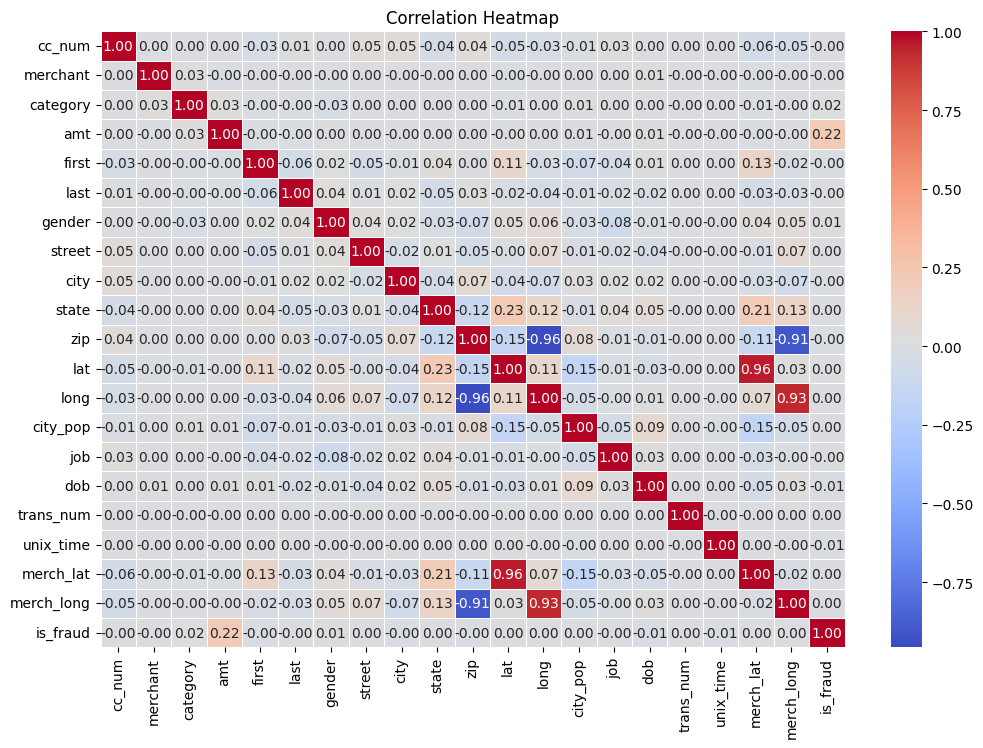

In [6]:
# Drop non-numeric columns
import matplotlib.pyplot as plt
numeric_data = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# Assuming credit_card_data is your DataFrame
numeric_columns = df.select_dtypes(include='number')
fraud_correlation = numeric_columns.corr()['is_fraud'].abs().sort_values(ascending=False)

print(fraud_correlation)

is_fraud      1.000000
amt           0.219404
category      0.020205
dob           0.012391
gender        0.007642
unix_time     0.005078
long          0.003260
first         0.003219
zip           0.002162
city_pop      0.002136
city          0.002092
merch_lat     0.001741
state         0.001730
merch_long    0.001721
street        0.001448
lat           0.001204
cc_num        0.000981
trans_num     0.000804
merchant      0.000536
last          0.000096
job           0.000093
Name: is_fraud, dtype: float64


In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Initialize and train the XGBoost classifier
xg = xgb.XGBClassifier()
xg.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xg.predict(x_test)
print(f"Model score: {xg.score(x_train, y_train)}")

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Computing R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.4f}')

# Computing RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.4f}')

Model score: 0.998993579732778
Accuracy: 99.81%
R^2 Score: 0.6750
RMSE: 0.0432


In [10]:
# Train a Support vector classifier
# clf = SVC()
# clf.fit(x_train, y_train)

# # Evaluate the model
# y_pred2 = clf.predict(x_test)
# print(f"Model score: {clf.score(x_train, y_train)}")

# # print("Classification Report:")
# # print(classification_report(y_test, y_pred))
# # print(f"test: {y_test},pred{y_pred2}")
# accuracy = accuracy_score(y_test, y_pred)

# print(f"Accuracy: {accuracy*100:.2f}%")

In [11]:
# Hyperparameter tuning
#     'C': [0.001, 0.01, 0.1, 1, 10, 100], 
#     'penalty': ['l1', 'l2'],  
#     'max_iter': [1000, 5000, 10000]
# }
# param_gd = {

In [12]:
# log_reg = LogisticRegression('saga',tol=0.001)
# grid_search  = GridSearchCV(log_reg,param_gd,cv=5,verbose=1,n_jobs=-1)
# grid_search.fit(x_train, y_train)
# model = grid_search.best_estimator_
# model = LogisticRegression(penalty='l1', solver='liblinear', tol=0.001)
# model.fit(x_train, y_train)

In [13]:
# cv_scores = cross_val_score(model, x, y, cv=5)
# print(f"Cross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}%")

# y_pred = model.predict(x_test)
# print(y_pred)
# y_pred_bin = [1 if pred > 0.5 else 0 for pred in y_pred]
# accuracy = accuracy_score(y_test, y_pred_bin)
# print(f"Accuracy on Test Set: {accuracy * 100:.2f}%")

# # Computing R^2 score
# r2 = r2_score(y_test, y_pred_bin)
# print(f'R^2 Score: {r2:.4f}')

# # Computing RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_pred_bin))
# print(f'RMSE: {rmse:.4f}')

# Mean Cross-Validation Accuracy: 99.37%
# [0 0 0 ... 0 0 0]
# Accuracy on Test Set: 99.37%
# R^2 Score: -0.0929
# RMSE: 0.0793

In [14]:
df_test = pd.read_csv("fraudTest.csv")
# print(df.head(5))
# print(df_test.head(5))

In [15]:
df_test.drop(['trans_date_trans_time','Unnamed: 0'],axis=1,inplace=True)
df_test['merchant'] = label_encoder.fit_transform(df_test['merchant'])
df_test['category'] = label_encoder.fit_transform(df_test['category'])
df_test['city'] = label_encoder.fit_transform(df_test['city'])
df_test['state'] = label_encoder.fit_transform(df_test['state'])
df_test['first'] = label_encoder.fit_transform(df_test['first'])
df_test['last'] = label_encoder.fit_transform(df_test['last'])
df_test['gender'] = label_encoder.fit_transform(df_test['gender'])
df_test['street'] = label_encoder.fit_transform(df_test['street'])
df_test['lat'] = label_encoder.fit_transform(df_test['lat'])
df_test['long'] = label_encoder.fit_transform(df_test['long'])
df_test['job'] = label_encoder.fit_transform(df_test['job'])
df_test['trans_num'] = label_encoder.fit_transform(df_test['trans_num'])
df_test['dob'] = pd.to_datetime(df_test['dob'])
df_test['dob'] = pd.to_numeric(df_test['dob'])

In [20]:
x_test = df_test.drop(columns='is_fraud')
Y_test = df_test['is_fraud']
X_test = scaler.transform(x_test)
X_test

array([[-0.31700718, -0.11872744,  0.96391193, ...,  1.75786524,
        -0.89063352,  0.65541318],
       [-0.31602776,  1.23483084,  0.96391193, ...,  1.75786586,
         0.17870805, -1.43300007],
       [-0.31600852,  1.33435718, -0.31373595, ...,  1.75786742,
         0.38327863,  1.16405886],
       ...,
       [-0.31416446,  0.7620807 ,  0.1973232 , ...,  3.05972132,
         1.58930361, -2.14134098],
       [-0.31875464, -1.33294883,  1.73050066, ...,  3.05972203,
         1.16114187, -1.9500586 ],
       [-0.31557112, -1.08413297, -1.59138383, ...,  3.0597228 ,
        -0.45544781, -0.49450766]])

In [21]:
# Make predictions on the test set
Y_pred = xg.predict(X_test)
# print(f"Model score: {xg.score(X_test, Y_test)}")

# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Computing R^2 score
r2 = r2_score(Y_test, Y_pred)
print(f'R^2 Score: {r2:.4f}')

# Computing RMSE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'RMSE: {rmse:.4f}')

Accuracy: 99.70%
R^2 Score: 0.2175
RMSE: 0.0549
